In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp '/content/drive/MyDrive/Twitter Sentiment Analysis/data' -r '/content/'

cp: cannot open '/content/drive/MyDrive/Twitter Sentiment Analysis/data/test.gsheet' for reading: Operation not supported


In [ ]:
import numpy as np
import pandas as pd


pd.options.display.max_colwidth = 100
train_data = pd.read_csv("/content/data/train.csv", encoding='ISO-8859-1')


In [ ]:
df = train_data

In [ ]:
train_data.head(5)

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL friend.............
1,2,0,I missed the New Moon trailer...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2...
4,5,0,i think mi bf is cheating on me!!! T_T


In [ ]:
rand_indexs = np.random.randint(1,len(train_data),50).tolist()
train_data["SentimentText"][rand_indexs]

7084                                                             #House didn't like the finale  going to bed
72591    @angelstar25  It's weird. I love Anoop but I wasn't a big fan of a lot of the songs he sang on t...
77761    @aprilyvonnex3 - it's so hard to hang out with you. your schedule and mine clash and doesn't wor...
6289                                                                    some things just never get easier...
51775                                                                               @aug1698 Awwwwww muffin 
32505                                                      @AGENTSANDRA007 I see that headed my way  arrrrgh
14289                              ....new post on &quot;My Fair Lady&quot;...musicalawakening.blogspot.com 
7001                 #postdigital event is being filmed on a flip camera! expensive cameras need not apply! 
86651                                   @christft http://twitpic.com/7jc15 - beautiful!! have a nice flight 
92393              

Identifying the punctutations and their removal

In [ ]:
import re
tweets_text = train_data.SentimentText.str.cat()
emos = set(re.findall(r" ([xX:;][-']?.) ",tweets_text))
emos_count = []
for emo in emos:
    emos_count.append((tweets_text.count(emo), emo))
sorted(emos_count,reverse=True)

[(3281, ':/'),
 (2874, 'x '),
 (2626, ': '),
 (1339, 'x@'),
 (1214, 'xx'),
 (1162, 'xa'),
 (984, ';3'),
 (887, 'xp'),
 (842, 'xo'),
 (713, ';)'),
 (483, 'xe'),
 (431, ';I'),
 (353, ';.'),
 (254, 'xD'),
 (251, 'x.'),
 (245, '::'),
 (234, 'X '),
 (217, ';t'),
 (209, ';s'),
 (185, ':O'),
 (176, ':3'),
 (166, ';D'),
 (159, ":'"),
 (157, 'XD'),
 (146, 'x3'),
 (142, ':p'),
 (126, ":'("),
 (118, ':@'),
 (117, 'xh'),
 (117, ':S'),
 (109, 'xm'),
 (104, ';p'),
 (104, ';-)'),
 (92, ':|'),
 (91, 'x,'),
 (89, ';P'),
 (76, 'xd'),
 (75, ';o'),
 (75, ';d'),
 (71, ':o'),
 (65, 'XX'),
 (63, ':L'),
 (59, 'Xx'),
 (59, ':1'),
 (58, ':]'),
 (57, ':s'),
 (56, ':0'),
 (54, 'XO'),
 (44, ';;'),
 (43, ';('),
 (38, ':-D'),
 (37, 'xk'),
 (36, 'XT'),
 (35, 'x?'),
 (35, 'x)'),
 (34, 'x2'),
 (33, ';/'),
 (32, 'x:'),
 (32, ':\\'),
 (31, 'x-'),
 (27, 'Xo'),
 (27, 'XP'),
 (27, ':-/'),
 (26, ':-P'),
 (25, ':*'),
 (23, 'xX'),
 (22, ":')"),
 (17, 'xP'),
 (16, ':['),
 (16, ':-p'),
 (14, 'x]'),
 (14, 'XM'),
 (13, ':-O'),
 (1

In [ ]:
#punctuation removal
form = "\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:\/[^\s/]*)*','"
for i in range(len(train_data)):
  train_data.iloc[i, 2] = re.sub(form, ' ', train_data.iloc[i, 2])

Tokenization and Stemming

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
def most_used_words(text):
    tokens = word_tokenize(text)
    frequency_dist = nltk.FreqDist(tokens)
    print("There is %d different words" % len(set(tokens)))
    return sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from nltk.corpus import stopwords

nltk.download("stopwords")

mw = most_used_words(train_data.SentimentText.str.cat())
most_words = []
for w in mw:
    if len(most_words) == 1000:
        break
    if w in stopwords.words("english"):
        continue
    else:
        most_words.append(w)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


There is 128930 different words


In [ ]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
def stem_tokenize(text):
    stemmer = SnowballStemmer("english")
    stemmer = WordNetLemmatizer()
    return [stemmer.lemmatize(token) for token in word_tokenize(text)]

def lemmatize_tokenize(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in word_tokenize(text)]

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
#punkt sentence_tokenizer
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
#TreeBank word tokenizer
from nltk.tokenize import TreebankWordTokenizer
treebank = TreebankWordTokenizer()
rf_data = train_data.iloc[0:5, 2]
print(rf_data)
print("Punkt Sentence tokenizer")
for text in rf_data:
  sent_tokenize(text)
  print(sent_tokenize(text))

print("TreeBank word tokenizer")
for text in rf_data:
  treebank.tokenize(text)
  print(treebank.tokenize(text))



[nltk_data] Downloading package punkt to /root/nltk_data...


0                                                               is so sad for my APL friend.............
1                                                                       I missed the New Moon trailer...
2                                                                                omg its already 7:30 :O
3              .. Omgaga. Im sooo  im gunna CRy. I've been at this dentist since 11.. I was suposed 2...
4                                                           i think mi bf is cheating on me!!!       T_T
Name: SentimentText, dtype: object
Punkt Sentence tokenizer
['                     is so sad for my APL friend.............']
['                   I missed the New Moon trailer...']
['              omg its already 7:30 :O']
['          .. Omgaga.', 'Im sooo  im gunna CRy.', "I've been at this dentist since 11..", 'I was suposed 2 just get a crown put on (30mins)...']
['         i think mi bf is cheating on me!!!', 'T_T']
TreeBank word tokenizer
['is', 'so', 'sad', 'for',

[nltk_data]   Package punkt is already up-to-date!


# Tagging

In [ ]:
#POStagging
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
test_dt = train_data
for txt in rf_data:
  tokenized = sent_tokenize(txt)
  for i in tokenized:
      wordsList = nltk.word_tokenize(i)
      wordsList = [w for w in wordsList if not w in stop_words]
      tagged = nltk.pos_tag(wordsList)
      print(tagged)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('sad', 'JJ'), ('APL', 'NNP'), ('friend', 'NN'), ('.............', 'NN')]
[('I', 'PRP'), ('missed', 'VBD'), ('New', 'NNP'), ('Moon', 'NNP'), ('trailer', 'NN'), ('...', ':')]
[('omg', 'NNS'), ('already', 'RB'), ('7:30', 'CD'), (':', ':'), ('O', 'NN')]
[('..', 'JJ'), ('Omgaga', 'NNP'), ('.', '.')]
[('Im', 'NNP'), ('sooo', 'NN'), ('im', 'NN'), ('gunna', 'NN'), ('CRy', 'NNP'), ('.', '.')]
[('I', 'PRP'), ("'ve", 'VBP'), ('dentist', 'VBN'), ('since', 'IN'), ('11', 'CD'), ('..', 'NNS')]
[('I', 'PRP'), ('suposed', 'VBD'), ('2', 'CD'), ('get', 'NN'), ('crown', 'VBN'), ('put', 'NN'), ('(', '('), ('30mins', 'CD'), (')', ')'), ('...', ':')]
[('think', 'VB'), ('mi', 'NNS'), ('bf', 'IN'), ('cheating', 'VBG'), ('!', '.'), ('!', '.'), ('!', '.')]
[('T_T', 'NN')]


In [ ]:
rf_data.head()

0                                                               is so sad for my APL friend.............
1                                                                       I missed the New Moon trailer...
2                                                                                omg its already 7:30 :O
3              .. Omgaga. Im sooo  im gunna CRy. I've been at this dentist since 11.. I was suposed 2...
4                                                           i think mi bf is cheating on me!!!       T_T
Name: SentimentText, dtype: object

In [ ]:
#DictTagging
from nltk.corpus import brown
from nltk.tag import UnigramTagger
nltk.download('brown')
tagger = UnigramTagger(brown.tagged_sents(categories='news')[:500])
sent = rf_data[0].split(" ")
for word, tag in tagger.tag(sent):
  print(word, '->', tag)

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


 -> None
 -> None
 -> None
 -> None
 -> None
 -> None
 -> None
 -> None
 -> None
 -> None
 -> None
 -> None
 -> None
 -> None
 -> None
 -> None
 -> None
 -> None
 -> None
 -> None
 -> None
is -> BEZ
so -> CS
sad -> None
for -> IN
my -> PP$
APL -> None
friend............. -> None


Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.pipeline import Pipeline
class TextPreProc(BaseEstimator,TransformerMixin):
    def __init__(self, use_mention=False):
        self.use_mention = use_mention
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        # We can choose between keeping the mentions
        # or deleting them
        if self.use_mention:
            X = X.str.replace(r"@[a-zA-Z0-9_]* ", " @tags ")
        else:
            X = X.str.replace(r"@[a-zA-Z0-9_]* ", "")
            
        # Keeping only the word after the #
        X = X.str.replace("#", "")
        X = X.str.replace(r"[-\.\n]", "")
        # Removing HTML garbage
        X = X.str.replace(r"&\w+;", "")
        # Removing links
        X = X.str.replace(r"https?://\S*", "")
        # replace repeated letters with only two occurences
        # heeeelllloooo => heelloo
        X = X.str.replace(r"(.)\1+", r"\1\1")
        X = X.str.lower()
        return X

In [ ]:
from sklearn.model_selection import train_test_split
nltk.download('omw-1.4')
sentiments = train_data['Sentiment']
tweets = train_data['SentimentText']

# I get those parameters from the 'Fine tune the model' part
vectorizer = TfidfVectorizer(tokenizer=lemmatize_tokenize, ngram_range=(1,2))
pipeline = Pipeline([
    ('text_pre_processing', TextPreProc(use_mention=True)),
    ('vectorizer', vectorizer),
])
learn_data, test_data, sentiments_learning, sentiments_test = train_test_split(tweets, sentiments, test_size=0.3)
learning_data = pipeline.fit_transform(learn_data)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
<ipython-input-16-467f6e5f37f1>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  X = X.str.replace(r"@[a-zA-Z0-9_]* ", " @tags ")
<ipython-input-16-467f6e5f37f1>:21: FutureWarning: The default value of regex will change from True to False in a future version.
  X = X.str.replace(r"[-\.\n]", "")
<ipython-input-16-467f6e5f37f1>:23: FutureWarning: The default value of regex will change from True to False in a future version.
  X = X.str.replace(r"&\w+;", "")
<ipython-input-16-467f6e5f37f1>:25: FutureWarning: The default value of regex will change from True to False in a future version.
  X = X.str.replace(r"https?://\S*", "")
<ipython-input-16-467f6e5f37f1>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  X = X.str.replace(r"(.)\1+", r"\1\1")
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWa

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

lr = LogisticRegression()
bnb = BernoulliNB()
mnb = MultinomialNB()

models = {
    'logitic regression': lr,
    'bernoulliNB': bnb,
    'multinomialNB': mnb,
}

for model in models.keys():
    scores = cross_val_score(models[model], learning_data, sentiments_learning, scoring="f1", cv=10)
    print("===", model, "===")
    print("scores = ", scores)
    print("mean = ", scores.mean())
    print("variance = ", scores.var())
    models[model].fit(learning_data, sentiments_learning)
    print("score on the learning data (accuracy) = ", accuracy_score(models[model].predict(learning_data), sentiments_learning))
    print("")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

=== logitic regression ===
scores =  [0.81294358 0.81424815 0.81602303 0.81543098 0.82009881 0.79840271
 0.80516036 0.81842232 0.8166065  0.81727415]
mean =  0.8134610579290168
variance =  4.0009432005803623e-05


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score on the learning data (accuracy) =  0.8702708881014973

=== bernoulliNB ===
scores =  [0.78646441 0.78810496 0.79223032 0.79169112 0.79281381 0.78358998
 0.78450193 0.78981189 0.79052398 0.79688046]
mean =  0.7896612859248913
variance =  1.496637054357567e-05
score on the learning data (accuracy) =  0.9016316150417191

=== multinomialNB ===
scores =  [0.80676542 0.81231446 0.81021898 0.81363081 0.81152355 0.80293268
 0.80589735 0.81259669 0.8132257  0.8117608 ]
mean =  0.8100866438571843
variance =  1.1832316152235943e-05
score on the learning data (accuracy) =  0.8968167790604641



In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search_pipeline = Pipeline([
    ('text_pre_processing', TextPreProc()),
    ('vectorizer', TfidfVectorizer()),
    ('model', MultinomialNB()),
])

params = [
    {
        'text_pre_processing__use_mention': [True, False],
        'vectorizer__max_features': [1000, 2000, 5000, 10000, 20000, None],
        'vectorizer__ngram_range': [(1,1), (1,2)],
    },
]
grid_search = GridSearchCV(grid_search_pipeline, params, cv=5, scoring='f1')
grid_search.fit(learn_data, sentiments_learning)
print(grid_search.best_params_)

<ipython-input-16-467f6e5f37f1>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  X = X.str.replace(r"@[a-zA-Z0-9_]* ", " @tags ")
<ipython-input-16-467f6e5f37f1>:21: FutureWarning: The default value of regex will change from True to False in a future version.
  X = X.str.replace(r"[-\.\n]", "")
<ipython-input-16-467f6e5f37f1>:23: FutureWarning: The default value of regex will change from True to False in a future version.
  X = X.str.replace(r"&\w+;", "")
<ipython-input-16-467f6e5f37f1>:25: FutureWarning: The default value of regex will change from True to False in a future version.
  X = X.str.replace(r"https?://\S*", "")
<ipython-input-16-467f6e5f37f1>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  X = X.str.replace(r"(.)\1+", r"\1\1")
<ipython-input-16-467f6e5f37f1>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  X = X.str.replac

{'text_pre_processing__use_mention': True, 'vectorizer__max_features': None, 'vectorizer__ngram_range': (1, 2)}


Calculating the Scores for each cluster

In [ ]:
test_data = pd.read_csv('/content/data/test.csv', encoding='ISO-8859-1')

In [ ]:
precision_scores = []
batch_sizes = []

In [ ]:
import numpy as np
import random
from sklearn.metrics import precision_recall_fscore_support
def score_an(dt):
  sentiments = dt['Sentiment']
  tweets = dt['SentimentText']
  vectorizer = TfidfVectorizer(tokenizer=lemmatize_tokenize, ngram_range=(1,2))
  pipeline = Pipeline([
      ('text_pre_processing', TextPreProc(use_mention=True)),
      ('vectorizer', vectorizer),
  ])
  learn_data, test_data, sentiments_learning, sentiments_test = train_test_split(tweets, sentiments, test_size=0.3)
  learning_data = pipeline.fit_transform(learn_data)
  mnb.fit(learning_data, sentiments_learning)
  testing_data = pipeline.transform(test_data)
  sub_learning = pipeline.transform(dt.SentimentText)
  y_pred = mnb.predict(sub_learning)
  scores = precision_recall_fscore_support(sentiments, y_pred, average='macro')
  precision = scores[0]
  return precision

In [ ]:
batches = 10
start = 0
for i in range(batches):
  n = random.randint(8000, 12000)
  batch = test_dt.iloc[:n, :]
  batch_sizes.append(abs(n-start))
  pr = score_an(batch)*100
  score = float(f"{pr:.2f}")
  precision_scores.append(score)


<ipython-input-16-467f6e5f37f1>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  X = X.str.replace(r"@[a-zA-Z0-9_]* ", " @tags ")
<ipython-input-16-467f6e5f37f1>:21: FutureWarning: The default value of regex will change from True to False in a future version.
  X = X.str.replace(r"[-\.\n]", "")
<ipython-input-16-467f6e5f37f1>:23: FutureWarning: The default value of regex will change from True to False in a future version.
  X = X.str.replace(r"&\w+;", "")
<ipython-input-16-467f6e5f37f1>:25: FutureWarning: The default value of regex will change from True to False in a future version.
  X = X.str.replace(r"https?://\S*", "")
<ipython-input-16-467f6e5f37f1>:28: FutureWarning: The default value of regex will change from True to False in a future version.
  X = X.str.replace(r"(.)\1+", r"\1\1")
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 't

In [ ]:
precision_scores

[87.74, 88.05, 88.47, 87.84, 88.1, 88.59, 87.17, 88.02, 88.69, 87.69]

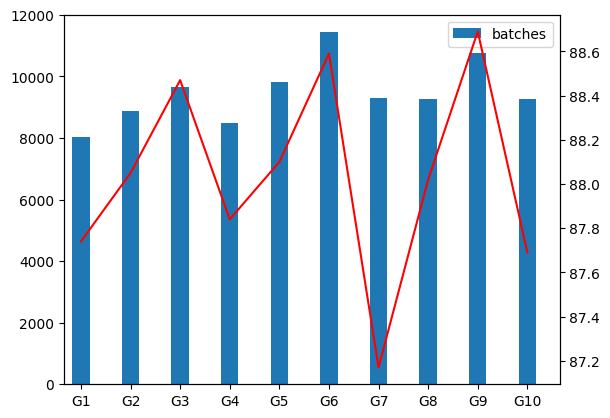

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
width = .35 # width of a bar
labels = ('G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10')

m1_t = pd.DataFrame({
 'batches' : batch_sizes[:10],
 'precision': precision_scores
 })

m1_t[['batches']].plot(kind='bar', width = width)
m1_t['precision'].plot(secondary_y=True, color='red')

ax = plt.gca()
plt.xlim([-width, len(m1_t['precision'])-width])
ax.set_xticklabels(labels)

plt.show()